# Tarea Semanal N°5
### Autor: Gonzalo Goumaz

## Requisitos de diseño
Se pide diseñar un filtro pasa altos que presente máxima planicidad en la banda de paso, para una frecuencia de corte de 300Hz, y un cero de transmisión en 100Hz.
La respuesta del prototipo pasa bajos es la siguiente:
<figure>
<center>
<img src="prototipo.png">
<figcaption> Fig 1: Respuesta del filtro prototipo </figcaption>
</figure>


## Desarrollo del filtro pasa altos.
En esta sección se desarrollan los puntos a) y b) utilizando los conceptos aprendidos en el curso.

In [1]:
from IPython.display import IFrame
IFrame("./TS5-A.pdf", width = 900, height = 900)

### Simulación en Python.
Para corroborar los resultados obtenidos, se realiza la siguiente simulación en Python.

Transferencia del filtro prototipo


<IPython.core.display.Math object>


Transferencia del filtro prototipo en su forma factorizada:



<IPython.core.display.Math object>

Transferencia del filtro pasa altos normalizado


<IPython.core.display.Math object>


Transferencia del filtro pasa altos normalizado en su forma factorizada:



<IPython.core.display.Math object>

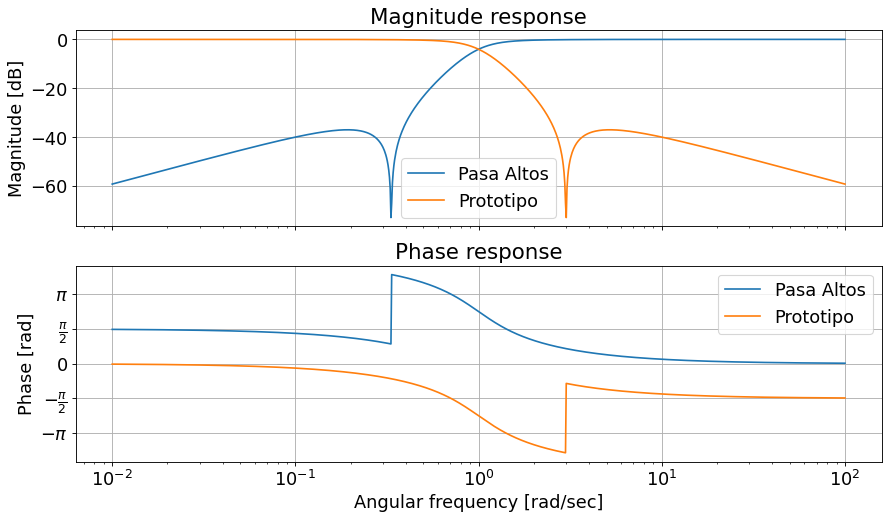

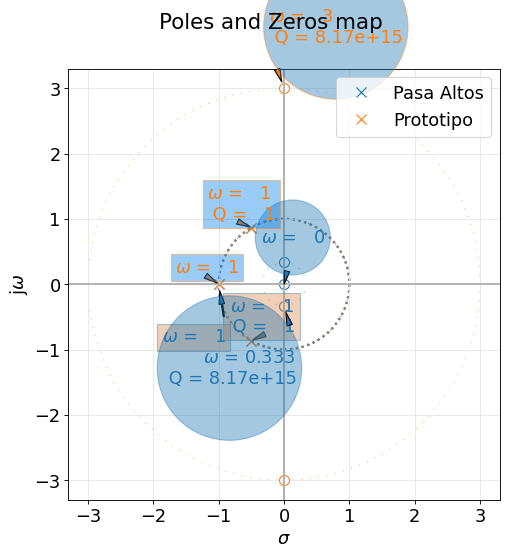

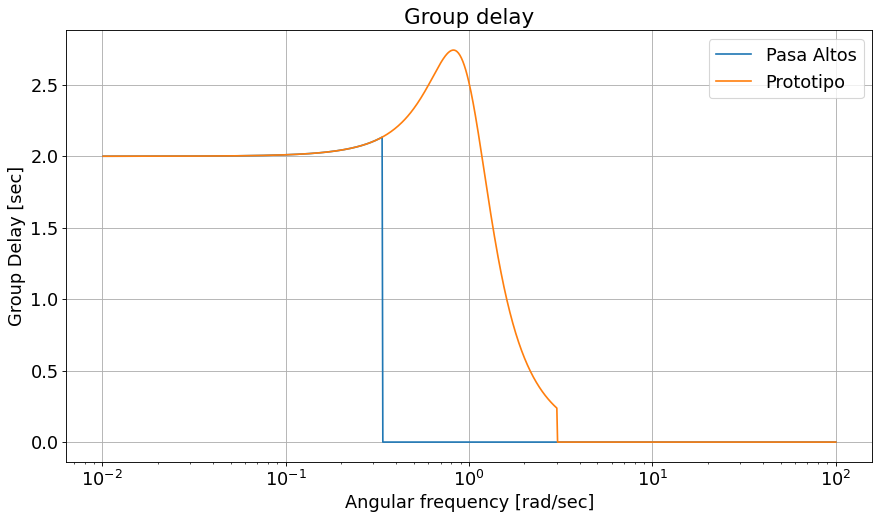

In [2]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import pytc2.sistemas_lineales as tc2

# Para fijar el estilo de gráficos en el notebook

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80
fig_font_size = 16

plt.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
plt.rcParams['figure.dpi'] = (fig_dpi)
plt.rcParams.update({'font.size':fig_font_size})

#Requisitos de plantilla

fc = 300       # [Hz]
fz = 100
n  = 3         # [Hz]

# Normalización de frecuencia
wc = 1
wz = fz/fc

# Plantilla del pasabajos prototipo
Omega_c = 1
Omega_z = 1/wz

# La frecuencia de corte se define como la frecuencia en la cual la transferencia cae 3dB respecto de la banda de paso
# Entonces diseño como Butter para esa frecuencia.

z_lp, p_lp, k_lp = sig.buttap(n)

num_lp, den_lp = sig.zpk2tf(z_lp, p_lp, k_lp)

# Agrego el cero de transmision

num_zero = [1/(Omega_z**2), 0, 1]

# Armo la transferencia del filtro prototipo
tf_proto = sig.TransferFunction(num_zero, den_lp)
print("Transferencia del filtro prototipo")
tc2.pretty_print_lti(num_zero, den_lp)

# factorizo la expresion
sos = tc2.tf2sos_analog(num_zero, den_lp)
print("\nTransferencia del filtro prototipo en su forma factorizada:\n")
tc2.pretty_print_SOS(sos)


# Aplico el núcleo de transformación PasaBajo-PasaAlto
num_hp, den_hp = sig.lp2hp(num_zero, den_lp)
tf_hp = sig.TransferFunction(num_hp, den_hp)

print("Transferencia del filtro pasa altos normalizado")
tc2.pretty_print_lti(num_hp, den_hp)

# factorizo la expresion
sos = tc2.tf2sos_analog(num_hp, den_hp)
print("\nTransferencia del filtro pasa altos normalizado en su forma factorizada:\n")
tc2.pretty_print_SOS(sos)

# Analizo las transferencias obtenidas
tc2.analyze_sys(tf_hp, sys_name='Pasa Altos')
tc2.analyze_sys(tf_proto, sys_name='Prototipo')

### Análisis de los gráficos obtenidos
Con respecto al filtro prototipo, se puede ver a simple vista que cumple con la respuesta dada en la consigna.
Si se pone el cursor sobre la frecuencia que se corresponde con el cero de transmisión, puede verse que el valor para el eje de frecuencias es $0.33 rad/seg$ lo cual es correcto dado que la norma de frecuencia en radianes sobre segundo es $2\pi*300Hz$, por lo que al desnormalizar resulta que la frecuencia en la que se ubica el cero de transmisión es de $100Hz$
<figure>
<center>
<img src="transmission_zero_freq.png">
<figcaption> Fig 2: Frecuencia de cero de transmisión, simulada en python.</figcaption>
</figure>

Si se pone el cursor sobre la frecuencia de corte, de valor uno por estar normalizada, puede verse que la atenuación es cercana a los 4dB, compuesta por los 3dB por los polos de máxima planicidad y 1dB debido al cero de transmisión.
<figure>
<center>
<img src="freq_corte.png">
<figcaption> Fig 3: Atenuación en la frecuencia de corte, simulada en python. </figcaption>
</figure>

El diagrama de polos y ceros obtenido resulta congruente con lo anticipado en el análisis conceptual. Puede verse mejor en la siguiente figura.
<figure>
<center>
<img src="polos_ceros.png">
<figcaption> Fig 4: Diagrama de polos y ceros para el filtro obtenido, simulado en python. </figcaption>
</figure>

## Implementación del filtro con estructura propuesta
En este punto del trabajo, se pide implementar el filtro pasa altos desarrollado, utilizando para la sección de 2do orden la siguiente estructura
<figure>
<center>
<img src="red_propuesta.png">
<figcaption> Fig 5: Red propuesta para la sección de 2do orden. </figcaption>
</figure>

Para implementar el filtro utilizando esta estructura, voy a asumir que R1 y R2 son distintas a R, de lo contrario sería imposible ubicar un cero de transmisión en una frecuencia distinta a la de corte de los polos.
Lo primero será hallar la función de transferencia de esta red, para luego determinar qué valores se deben elegir para los componentes.
El desarrollo puede verse en el pdf a continuación.

In [3]:
from IPython.display import IFrame
IFrame("./TS5-B.pdf", width = 900, height = 900)

### Simulación de la red implementada en LTspice
Para verificar que la red implementada se corresponda con el filtro pasa altos, se realiza una simulación en LTspice.
<figure>
<center>
<img src="red_1.png">
<figcaption> Fig 6a: Red implementada en LTspice. </figcaption>
</figure>

<figure>
<center>
<img src="sim_1.png">
<figcaption> Fig 6b: Simulación para norma de impedancia unitaria. </figcaption>
</figure>

Se puede observar que el comportamiento de la red es el esperado. No obstante, si se utiliza una norma de impedancia mayor, el filtro deja de comportarse según lo esperado.
<figure>
<center>
<img src="Error_sim_1.png">
<figcaption> Fig 6c: Simulación para norma de impedancia = 10$\Omega$. </figcaption>
</figure>

Este filtro no puede ser implementado por esta red, pues solo funciona para valores normalizados en impedancia con una norma unitaria.

## Comparación entre la red propuesta y la red dada por Schaumann
La red propuesta por Schaumann es una estructura bicuadrada generalizada que se basa en el GIC de Antoniou.
<figure>
<center>
<img src="red_schaumann.png">
<figcaption> Fig 7: Red propuesta por Schaumann </figcaption>
</figure>

Para recordar, la red propuesta era:
<figure>
<center>
<img src="red_propuesta.png">
<figcaption> Fig 8: Red propuesta en el enunciado. </figcaption>
</figure>
    

Si en el circuito de Schaumann se toma que $a=1$, $b=0$ y $c=1$ el circuito tiene una similitud importante con la red. Además, se observa que le capacitor que en la red propuesta en el enunciada pasa de estar en la posición Z4 correspondiente al GIC a estar en la posición de Z2, lo cual hace que el circuito sea más estable.
Se observa también que en la red de Schaumann, las resistencias en el GIC tienen el mismo valor, excepto la R5, en la cual se realiza un levantamiento que, para el propósito de este trabajo, permitirá ubicar un cero de transmisión en la frecuencia deseada.

## Implementación del filtro utilizando la red de Schaumann
La transferencia de la red de Schaumann está dada por
\begin{equation}
    T_B(S) = \frac{S^2(2a-c)+S \frac{\omega_0}{Q}(2b-c)+c\omega_0^2}{S^2+S \frac{\omega_0}{Q}+ \omega_0^2}
\end{equation}
donde
\begin{equation}
    \omega_0 = \frac{1}{RC}
\end{equation}

Entonces, para implementar la transferencia del filtro pasa altos desarrollado, se debe tener que
\begin{equation}
    c = \left(\frac{1}{\omega_z}\right)^2
\end{equation}

\begin{equation}
    b = \frac{c}{2}
\end{equation}

\begin{equation}
    a = \frac{1+c}{2}
\end{equation}


Se procede a implementar la red en LTspcice y a realizar una simulación para analizar su comportamiento.
<figure>
<center>
<img src="red_2.png">
<figcaption> Fig 9a: Filtro implementado con la red de Schaumann. </figcaption>
</figure>

<figure>
<center>
<img src="sim_2.png">
<figcaption> Fig 9b: Simulación del filtro implementado con la red de Schaumann. </figcaption>
</figure>

Se observa que con esta red sí es posible implementar el filtro pasa altos pedido, pues no aparece el problema al tabajar con una norma de impedancia mayor a 1. Para el caso de la simulación, se utiliza una norma de 1K$\Omega$